In [1]:
from base_functions import *


start, end =  "2010-01-10", "2022-10-10"
snp500 = getCloseDataPandas("^GSPC", start, end)
efa = getCloseDataPandas("EFA", start, end)
ief = getCloseDataPandas("IEF", start, end)
dbc = getCloseDataPandas("DBC", start, end)
vnq = getCloseDataPandas("VNQ", start, end)


closeData = pd.concat([snp500, efa, ief, dbc, vnq], axis=1)
closeData.dropna(inplace=True)
closeData.columns = ["spy", "efa", "ief", "dbc", "vnq"]
print(closeData)

                    spy        efa        ief        dbc        vnq
Date                                                               
2010-01-11  1146.979980  57.720001  89.019997  25.299999  44.830002
2010-01-12  1136.219971  57.040001  89.660004  24.760000  44.080002
2010-01-13  1145.680054  57.520000  89.230003  24.780001  44.970001
2010-01-14  1148.459961  57.959999  89.650002  24.650000  44.930000
2010-01-15  1136.030029  57.049999  90.050003  24.370001  44.590000
...                 ...        ...        ...        ...        ...
2022-10-04  3790.929932  59.410000  97.139999  25.110001  83.250000
2022-10-05  3783.280029  58.779999  96.220001  25.559999  81.620003
2022-10-06  3744.520020  57.750000  95.690002  25.719999  79.349998
2022-10-07  3639.659912  56.830002  95.220001  25.990000  77.440002
2022-10-10  3612.389893  56.509998  94.660004  25.700001  76.709999

[3210 rows x 5 columns]


In [2]:
def getWeightByAvg(closeDataSet, n = 10):
    priceOnRebalDate = closeDataSet.loc[getRebalancingDate(closeDataSet)] # 리밸런싱 일자의 가격 데이터
    avg = priceOnRebalDate.copy()
    
    for i in range(1, n):
        avg += priceOnRebalDate.shift(i).fillna(method="bfill")
    avg = avg / n
    print(avg)
    
    weight = pd.DataFrame([], index=avg.index)
    for asset, assetCloseData in priceOnRebalDate.iteritems():
        weight[asset] = np.where(assetCloseData > avg[asset], 0.2, 0)


    weight["cash"] = 1 - weight.apply(np.sum, axis=1)
    return weight

weight = getWeightByAvg(closeData)


                    spy        efa         ief        dbc         vnq
Date                                                                 
2010-01-29  1073.869995  52.480000   90.699997  22.690001   42.270000
2010-02-26  1076.931995  52.493999   90.699997  22.784000   42.506001
2010-03-31  1086.488000  52.843999   90.579997  22.867000   43.160001
2010-04-30  1097.769995  53.037000   90.581998  23.042000   44.163000
2010-05-28  1099.323999  52.621000   90.821998  22.969000   44.887000
...                 ...        ...         ...        ...         ...
2022-06-30  4371.545996  73.780000  110.124001  23.711000  104.484000
2022-07-29  4353.820996  72.551000  109.119000  24.304000  104.202000
2022-08-31  4288.783008  70.672000  107.750001  24.741000  102.599001
2022-09-30  4190.645020  68.589000  105.769000  25.184000   99.942001
2022-10-10  4075.265991  66.372000  103.735001  25.676000   96.012000

[154 rows x 5 columns]


In [3]:
closeData["cash"] = 1
dayRet, cumRet = getRebalancingPortfolio(closeData, weightDf=weight)
cagr, dd, mdd = getEval(cumRet)
print(cumRet)

return: 1.4389898096297344 
 cagr: 1.0291027183538901 
 mdd: 12.319571063999554
Date
2010-01-29    1.00000
2010-02-01    1.00000
2010-02-02    1.00000
2010-02-03    1.00000
2010-02-04    1.00000
               ...   
2022-10-04    1.43899
2022-10-05    1.43899
2022-10-06    1.43899
2022-10-07    1.43899
2022-10-10    1.43899
Length: 3197, dtype: float64


<Figure size 640x480 with 0 Axes>

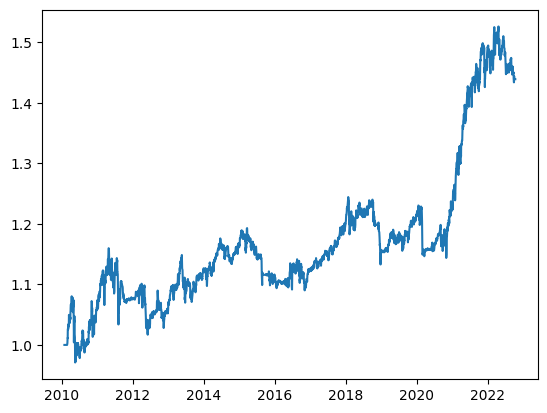

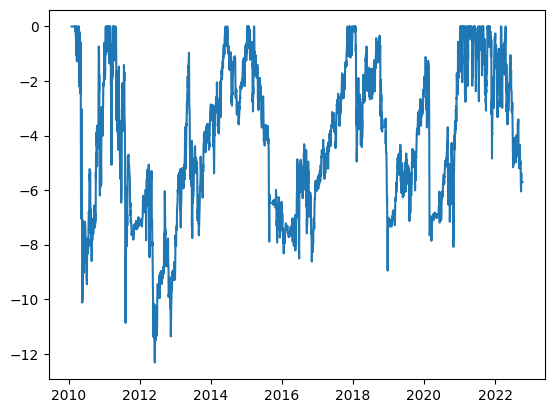

In [4]:
plt.figure()
plt.subplots()
plt.plot(cumRet)
plt.subplots()
plt.plot(-dd)